In [1]:
# SHRUTHI PASUMARTHI
# STUDENT ID : 801218392
# HOMEWORK 0

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
#Reading the dataset using pandas
dataset = pd.read_csv('D3.csv') 

In [3]:
#Dataset display
dataset.head() 

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [4]:
#Extracting the first three columns from the dataset, to form the 2d x array (datapoint array)
x = dataset.iloc[:, 0:3]
x_t = x.to_numpy()
print(x_t[: 5])

[[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]]


In [5]:
#Length of the extracted array
m = len(x_t)
m

100

In [6]:
#Making a column of ones as x0
x0_t = np.ones((100,1))

In [7]:
#Stacking the two columns together
x_t = np.hstack((x0_t, x_t))

In [8]:
#Extracting the columns of ground truths
y = dataset.iloc[:, 3]
y_t = y.to_numpy()
print(y[: 5])

0    4.387545
1    2.679650
2    2.968490
3    3.254065
4    3.536375
Name: Y, dtype: float64


In [9]:
#Checking the length of the ground truth column
len(y_t)

100

In [10]:
#Shaping the array into a m x 4 array, where each column is a datapoint vector
x_t = x_t.reshape(m,4)

In [11]:
#We define the parameter matrix as a 4 element matrix, as there are 4 datapoint columns
theta = np.zeros(4)  

In [12]:
#Definition of the cost function (as per formulas in class)
def compute_cost(x_t, y, theta): 
    #h = theta1.x1 + x0
    h = x_t.dot(theta) 
    #Loss = h-y
    j = np.subtract(h, y) 
    #For squared errors, squaring the individual loss function, j
    j2 = np.square(j) 
    #J, the overall loss function : J = 1/2m (sum(square of individual errors))
    J = 1 / (2 * m) * np.sum(j2) 
 
    return J 

cost = compute_cost(x_t, y, theta) 

In [13]:
#Calculating the gradient descent, the process done to find the least value of all the cost functions  
def gradient_descent(x_t, y, theta, alpha, iterations): 
    cost_history = np.zeros(iterations) 
 
    for i in range(iterations):
        #h = theta1.x1 + x0
        h = x_t.dot(theta) 
        #Loss = h-y
        j = np.subtract(h, y)
        #For the derivative of j wrt theta
        sum_delta = (alpha / m) * x_t.transpose().dot(j); 
        #Updating the new theta
        theta = theta - sum_delta;
        #Saving it in the history array
        cost_history[i] = compute_cost(x_t, y, theta)   
 
    return theta, cost_history 

In [14]:
theta = [0., 0., 0., 0.] 
iterations = 1500; 
alpha = 0.1; #Learning rate

In [15]:
theta, cost_history = gradient_descent(x_t, y, theta, alpha, iterations)
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 

Final value of theta = [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
cost_history = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


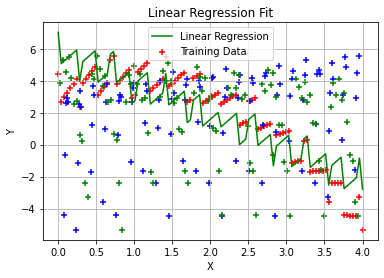

In [16]:
#Plot for x vs y (datapoints vs ground truth)
plt.scatter(x_t[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.scatter(x_t[:,2], y, color='blue', marker= '+') 
plt.scatter(x_t[:,3], y, color='green', marker= '+') 
#Plot for x vs h (datapoints vs predictions)
plt.plot(x_t[:,1],x_t.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

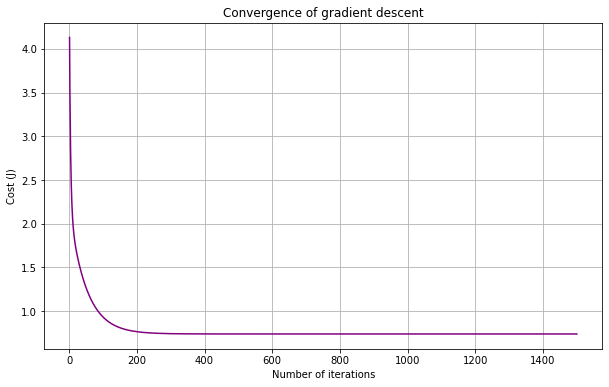

In [17]:
#Plot for cost_history (gradient descent curve)
plt.plot(range(1, iterations + 1),cost_history, color='purple') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

In [18]:
#Predicting the value for the new datapoints, using the formula- h = x1[3]*theta[4]+x1[2]*theta[3]+x1[1]*theta[2]+theta[1]
X1 = [1,1,1]
X2 = [2,0,4]
X3 = [3,2,1]

Y1 = theta[0]+X1[0]*theta[1]+X1[1]+theta[2]+X1[2]*theta[3]
Y1

4.577408529345462

In [19]:
Y2 = theta[0]+X2[0]*theta[1]+X2[1]+theta[2]+X2[2]*theta[3]
Y2

0.7768845616426605

In [20]:
Y3 = theta[0]+X3[0]*theta[1]+X3[1]+theta[2]+X3[2]*theta[3]
Y3

1.5699704283109108